<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/InteratorExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simples Iterator

In [ ]:
class Interrogator:
  def __init__(self, questions):
    self.questions = questions

  def  __iter__(self):
    return self.questions.__iter__()

  def __next__(self):
    return self.questions.__next__()

Create a list of questions

In [ ]:
questions = ['What is your name?', 'What is your quest?', 'What is the average airspeed velocity of an unladen swallow?']

awkward_person = Interrogator(questions)

for question in awkward_person:
  print(question)

What is your name?
What is your quest?
What is the average airspeed velocity of an unladen swallow?


## A Custom Iterator

In [ ]:
class PrimesBelow:
  def __init__(self, bound):
    self.candidate_numbers = list(range(2, bound))
  
  def __iter__(self):
    return self

  def __next__(self):
    if len(self.candidate_numbers)==0:
      raise StopIteration
    next_prime = self.candidate_numbers[0]
    self.candidate_numbers = [x for x in self.candidate_numbers if x % next_prime !=0]
    
    return next_prime


In [ ]:
primes_to_a_hundred = [prime for prime in PrimesBelow(100)]
print(primes_to_a_hundred)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## Controlling the Iteration

In [ ]:
primes_under_five = iter(PrimesBelow(5))

In [ ]:
next(primes_under_five)

StopIteration: ignored

## Itertool
* Using Infinite Sequences and takewhile

In [ ]:
class Primes:
  def __init__(self):
    self.current = 2
    
  def __iter__(self):
    return self
  
  def __next__(self):
    while True:
      current = self.current
      square_root = int(current**0.5)
      is_prime = True
      if square_root >=2:
        for i in range(2, square_root + 1):
          if current % i == 0:
            is_prime = False
            break
      self.current +=1
      if is_prime:
        return current

In [ ]:
### Using takewhile() to limit the iteration loop
import itertools
print([p for p in itertools.takewhile(lambda x: x<100, Primes())])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Finite to infinte loop

In [ ]:
import itertools
players = ['White', 'Black', 'Yellow', 'Red']

turns = itertools.cycle(players)

countdown = itertools.count(10,-1)
print([turn for turn in itertools.takewhile(lambda x: next(countdown)>0, turns)])

['White', 'Black', 'Yellow', 'Red', 'White', 'Black', 'Yellow', 'Red', 'White', 'Black']


In [ ]:
countdown = itertools.count(10,-1)


In [ ]:
next(turns)

'White'

### Generators
* allow a program to defer or postpone calculating a result until it's required.


In [ ]:
def primes_below(bound):
  candidates = list(range(2, bound))
  while(len(candidates) > 0):
    yield candidates[0]
    candidates = [c for c in candidates if c%candidates[0]!=0]

In [ ]:
print([prime for prime in primes_below(100)])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


### Using random numbers to find the Pi value
* Generator N random number (x, y) in range [0,1]
* Count number bounded in a quater of circle
* Multipy by 4 to get $\pi$ value
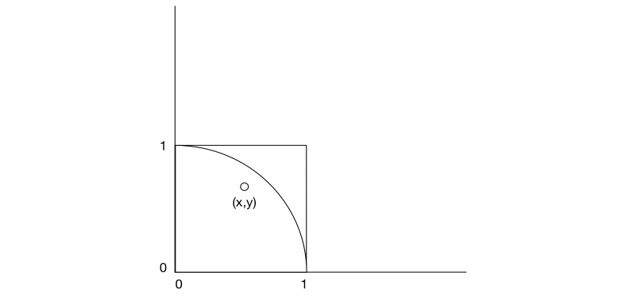

In [123]:
def Pigenerator():
  N_cir = 0
  N = 0
  for i in range(1,10000+1):
    x = random.random()
    y = random.random()
    N +=1
    if x**2 + y**2 <1:
      N_cir +=1
    if i%1000==0:
      yield N_cir/N*4
 
    

In [131]:
estimate = [pi for pi in Pigenerator()]
error = [pi - math.pi for pi in estimate]

In [132]:
print(estimate)
print(error)

[3.08, 3.188, 3.1613333333333333, 3.157, 3.1472, 3.1453333333333333, 3.149714285714286, 3.1405, 3.1386666666666665, 3.1364]
[-0.061592653589793045, 0.04640734641020705, 0.019740679743540213, 0.015407346410206912, 0.0056073464102071036, 0.0037406797435401984, 0.008121632124492795, -0.0010926535897932688, -0.0029259869231266222, -0.005192653589793039]


In [ ]:
import numpy as np
import random
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
def histogram(data: np.array, bins=50):

  plt.rcParams['figure.figsize'] = (20,3)
  cm = plt.cm.get_cmap('RdYlGn')

  plt.rcParams['figure.figsize'] = (6,2)

  n, bins, patches = plt.hist(data, bins = bins)
  bin_centers = 1*(bins[:-1] + bins[1:] )
  col = bin_centers - min(bin_centers)
  col /= max(col)

  for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

  plt.show()

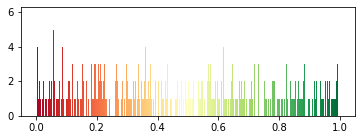

In [ ]:
x = [random.random() for i in range(10000)]

histogram(x, len(x))

In [ ]:
n = 100000
x = [random.random() for i in range(n)]
y = [random.random() for i in range(n)]

In [ ]:
import math
Num = 0
for p, q in zip(x,y):
  if p**2 + q**2 < 1:
    Num +=1

print(Num/len(x)*4)

3.14744
